In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
path = "D:/parkinson/NEW_DATAFRAME.xlsx"
df = pd.read_excel(path)

newdf = df.transpose()

newdf[0] = newdf[0].str.split(': ').str[1]
print(newdf)

               0       1         2       3       4       5     6        7     \
Genes           NaN  CDK11B  SLC35E2B  CDK11A  LRRC47  CEP104  MTOR  DNAJC16   
GSM6212891  Control    1409      3968     588    1880     708  2201      699   
GSM6212892  Control    1620      3280     901    1606    1050  1799      564   
GSM6212893       PD    1153      2047     782     787     854  1119      507   
GSM6212894       PD     918      1972     599     699     671  1107      436   
...             ...     ...       ...     ...     ...     ...   ...      ...   
GSM6213036  Control    1566      2617     919    1058    1331  2391      740   
GSM6213037       PD    1309      1440     662     546     695   844      393   
GSM6213038       PD     947      1703     584     607     670   887      413   
GSM6213039       PD     994      1037     474     389     464   545      290   
GSM6213040       PD    1330       937     592     449     635   719      347   

            8     9     ...    1665    

In [3]:
csv_filename = "input.csv" 
newdf.to_csv(csv_filename, index=False) 

In [4]:
path = "D:\parkinson\input.csv"
parkinson = pd.read_csv(path)
parkinson

,label,CDK11B,SLC35E2B,CDK11A,LRRC47,CEP104,MTOR,DNAJC16,DDI2,SPEN,...,MAP7D3,HTATSF1,SLITRK2,FMR1,MTMR1,DNASE1L1,ATP6AP1,FAM50A,G6PD,DKC1
0,Control,1409,3968,588,1880,708,2201,699,403,1561,...,85,2074,523,1244,935,526,5024,1110,937,650
1,Control,1620,3280,901,1606,1050,1799,564,490,2207,...,106,1623,583,1126,689,494,3754,1291,889,528
2,PD,1153,2047,782,787,854,1119,507,433,2603,...,159,1622,652,1387,517,258,1698,870,417,615
3,PD,918,1972,599,699,671,1107,436,353,2218,...,95,1178,559,936,480,245,1486,697,379,468
4,Control,966,508,300,239,317,266,95,174,915,...,62,716,77,634,102,82,408,463,205,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Control,1566,2617,919,1058,1331,2391,740,702,5239,...,198,1942,993,1654,791,511,2790,1179,931,671
146,PD,1309,1440,662,546,695,844,393,308,4304,...,151,1067,490,1088,328,188,1653,709,414,492
147,PD,947,1703,584,607,670,887,413,312,3685,...,101,1069,470,1037,346,171,1660,617,466,415
148,PD,994,1037,474,389,464,545,290,268,3219,...,144,814,250,811,284,204,908,640,325,415


In [5]:
X = parkinson.drop(columns=['label'])  
y = parkinson['label']

In [6]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [7]:
unique, counts= np.unique(y, return_counts=True)
dict(zip(unique,counts))

{0: 81, 1: 69}

<AxesSubplot: ylabel='count'>

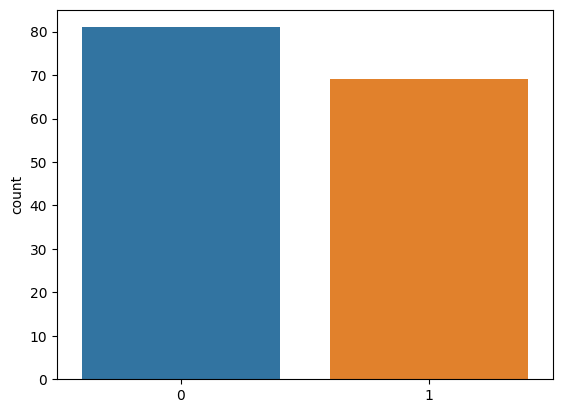

In [8]:
sns.countplot(x=y)

In [9]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]

lasso_cv = LassoCV(alphas=alphas, max_iter=100000)  

lasso_cv.fit(X_train,y_train)

best_alpha = lasso_cv.alpha_
best_lasso_coefficients = lasso_cv.coef_

y_pred_lasso = lasso_cv.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Best Alpha:", best_alpha)
print("Best Coefficients:", best_lasso_coefficients)
print("Mean Squared Error:", mse_lasso)

Best Alpha: 0.01
Best Coefficients: [ 0. -0. -0. ... -0. -0. -0.]
Mean Squared Error: 0.1174205309257667


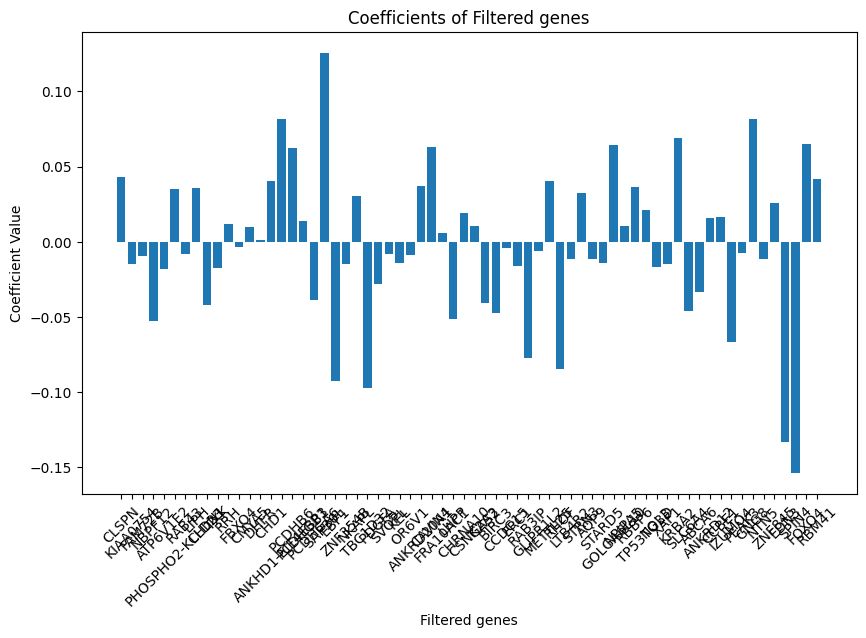

Gene_symbol: CLSPN, Coefficient: 0.04340834835004657
Gene_symbol: KIAA0754, Coefficient: -0.014501128379343437
Gene_symbol: FAM72B, Coefficient: -0.009395015932448214
Gene_symbol: NBPF12, Coefficient: -0.05293493030432037
Gene_symbol: ATP6V1E2, Coefficient: -0.018324283156957
Gene_symbol: PHOSPHO2-KLHL23, Coefficient: 0.03502218854277423
Gene_symbol: RAB43, Coefficient: -0.008145106393240233
Gene_symbol: LIPH, Coefficient: 0.03577695275036918
Gene_symbol: CLDN1, Coefficient: -0.042379273838039966
Gene_symbol: TXK, Coefficient: -0.01734887228862538
Gene_symbol: RRH, Coefficient: 0.011949811685430883
Gene_symbol: FBXO4, Coefficient: -0.0035846387705141375
Gene_symbol: CMYA5, Coefficient: 0.009943365016389262
Gene_symbol: DHFR, Coefficient: 0.001326015407838119
Gene_symbol: CHD1, Coefficient: 0.04016157600142394
Gene_symbol: ANKHD1-EIF4EBP3, Coefficient: 0.08191366737557544
Gene_symbol: PCDHB6, Coefficient: 0.062314674952509266
Gene_symbol: PCDHGB1, Coefficient: 0.014071469108712487
Gene_

In [14]:
filtered_genes_lasso = X.columns[best_lasso_coefficients != 0]
filtered_coeffs_lasso = best_lasso_coefficients[best_lasso_coefficients != 0]
lasso_genes_list = []

plt.figure(figsize=(10, 6))
plt.bar(filtered_genes_lasso, filtered_coeffs_lasso)
plt.xticks(rotation=45)
plt.xlabel("Filtered genes")
plt.ylabel("Coefficient Value")
plt.title("Coefficients of Filtered genes")
plt.show()

total_genes_selected=0
for gene, coef in zip(filtered_genes_lasso, filtered_coeffs_lasso):
    total_genes_selected+=1
    lasso_genes_list.append(gene)
    print(f"Gene_symbol: {gene}, Coefficient: {coef}")


with open("D:\parkinson\lasso_genes.txt", "w") as file:
    for gene in lasso_genes_list:
        file.write(gene + "\n")

print()
print("The total number of genes selected is: ", total_genes_selected)

In [15]:
ridge = RidgeCV(alphas=[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20], cv=None)

ridge.fit(X_train, y_train)

best_ridge = ridge.alpha_

best_ridge_coefficients = ridge.coef_

y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("Best Ridge:", best_ridge)
print("Best Coefficients:", best_ridge_coefficients)
print("Mean Squared Error:", mse_ridge)

Best Ridge: 20.0
Best Coefficients: [ 0.00693642 -0.00301226 -0.01581718 ... -0.00495079 -0.00764457
 -0.00460145]
Mean Squared Error: 0.12686900689759442


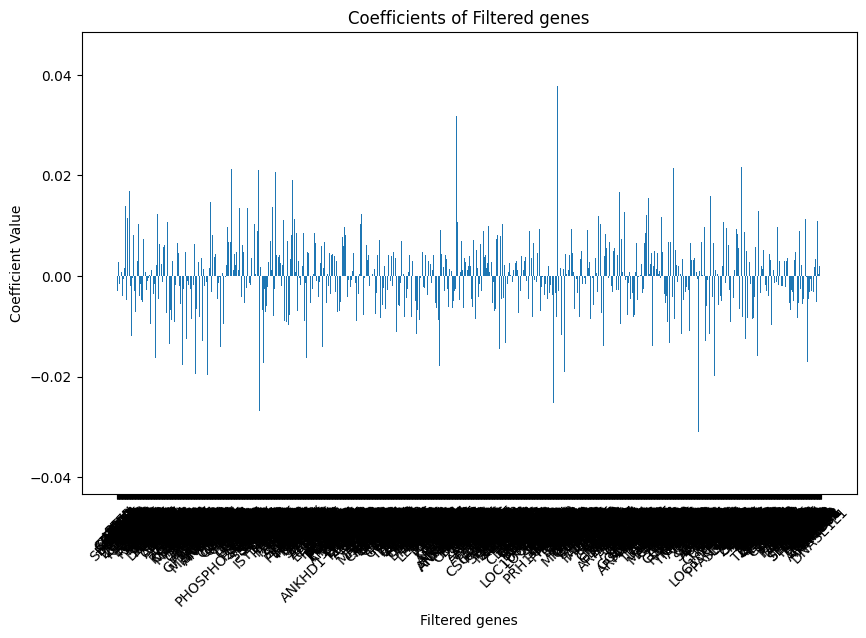

Gene_symbol: CDK11B, Coefficient: 0.006936416530931388
Gene_symbol: SLC35E2B, Coefficient: -0.0030122562192732415
Gene_symbol: CDK11A, Coefficient: -0.01581718430461182
Gene_symbol: LRRC47, Coefficient: -0.0026624651801597735
Gene_symbol: CEP104, Coefficient: 0.002750567716185333
Gene_symbol: MTOR, Coefficient: 0.004276808419720803
Gene_symbol: DNAJC16, Coefficient: -0.001664847459553487
Gene_symbol: DDI2, Coefficient: -0.008313941816157357
Gene_symbol: SPEN, Coefficient: 0.011377894102938463
Gene_symbol: EMC1, Coefficient: 0.0019702745880152087
Gene_symbol: DDOST, Coefficient: -0.0023402171079819085
Gene_symbol: HP1BP3, Coefficient: 0.0007822011596267924
Gene_symbol: HNRNPR, Coefficient: 0.0005090425963617598
Gene_symbol: ELOA, Coefficient: -0.00393713760170906
Gene_symbol: GALE, Coefficient: -0.007474883155575024
Gene_symbol: SRRM1, Coefficient: -0.001398981578199819
Gene_symbol: SYF2, Coefficient: -0.000556848447476728
Gene_symbol: RHD, Coefficient: -0.004275431390549905
Gene_symbol

In [16]:
filtered_genes_ridge = X.columns[best_ridge_coefficients != 0]
filtered_coeffs_ridge = best_ridge_coefficients[best_ridge_coefficients != 0]

plt.figure(figsize=(10, 6))
plt.bar(filtered_genes_ridge, filtered_coeffs_ridge)
plt.xticks(rotation=45)
plt.xlabel("Filtered genes")
plt.ylabel("Coefficient Value")
plt.title("Coefficients of Filtered genes")
plt.show()

total_genes_selected=0
for gene, coef in zip(filtered_genes_ridge, filtered_coeffs_ridge):
    total_genes_selected+=1
    print(f"Gene_symbol: {gene}, Coefficient: {coef}")

print()
print("The total number of genes selected is: ", total_genes_selected)

In [17]:
elastic_net = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[0.001, 0.01, 0.1, 1, 10], max_iter=100000)

elastic_net.fit(X_train, y_train)

best_alpha_elastic = elastic_net.alpha_
best_l1_ratio = elastic_net.l1_ratio_

coefficients_elastic = elastic_net.coef_

y_pred_elastic = elastic_net.predict(X_test)

mse_elastic = mean_squared_error(y_test, y_pred_elastic)

print("Best Alpha:", best_alpha_elastic)
print("Best L1 Ratio:", best_l1_ratio)
print("Mean Squared Error:", mse_elastic)

Best Alpha: 0.1
Best L1 Ratio: 0.1
Mean Squared Error: 0.12140744589219939


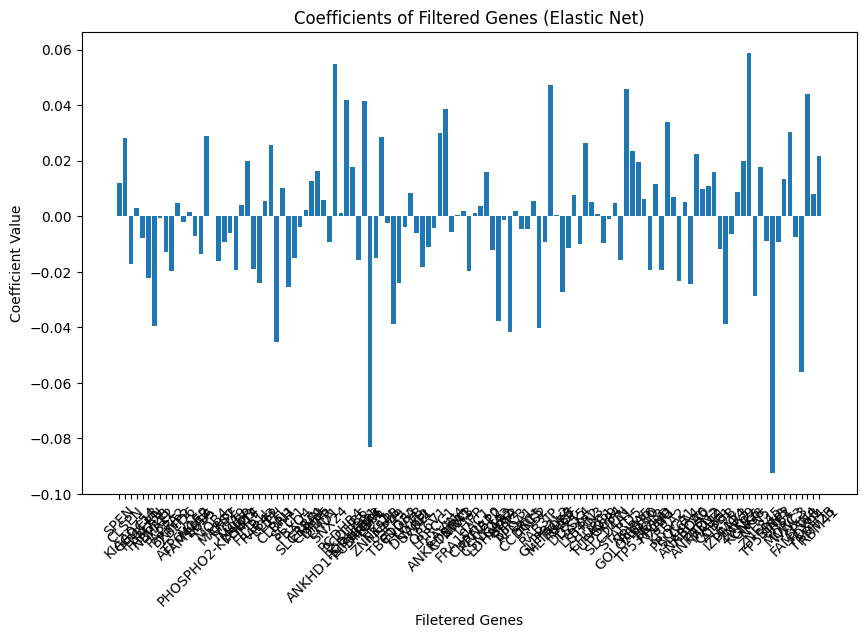

Gene_symbol: SPEN, Coefficient: 0.011818091312124097
Gene_symbol: CLSPN, Coefficient: 0.027983022265818416
Gene_symbol: KIAA0754, Coefficient: -0.017210303657825585
Gene_symbol: CCDC18, Coefficient: 0.0027745568464179428
Gene_symbol: PTGFRN, Coefficient: -0.00767042290234738
Gene_symbol: FAM72B, Coefficient: -0.02229966286632397
Gene_symbol: NBPF12, Coefficient: -0.039586284327309186
Gene_symbol: MAEL, Coefficient: -0.0005890269564456862
Gene_symbol: PAPPA2, Coefficient: -0.012853194820637284
Gene_symbol: BRINP2, Coefficient: -0.01977772100190213
Gene_symbol: ZBED6, Coefficient: 0.004861613320741382
Gene_symbol: ATP6V1E2, Coefficient: -0.0020494670153974816
Gene_symbol: FAM161A, Coefficient: 0.0016296315229606
Gene_symbol: MCEE, Coefficient: -0.007283125206843787
Gene_symbol: BBS5, Coefficient: -0.013757284835735557
Gene_symbol: PHOSPHO2-KLHL23, Coefficient: 0.028907436204395846
Gene_symbol: MOB4, Coefficient: 7.462846836358127e-05
Gene_symbol: MARS2, Coefficient: -0.01626955735122294


In [18]:
filtered_genes_elastic = X.columns[coefficients_elastic != 0]
filtered_coeffs_elastic = coefficients_elastic[coefficients_elastic != 0]

plt.figure(figsize=(10, 6))
plt.bar(filtered_genes_elastic, filtered_coeffs_elastic)
plt.xticks(rotation=45)
plt.xlabel("Filetered Genes")
plt.ylabel("Coefficient Value")
plt.title("Coefficients of Filtered Genes (Elastic Net)")
plt.show()

total_genes_selected=0
for gene, coef in zip(filtered_genes_elastic, filtered_coeffs_elastic):
    total_genes_selected+=1
    print(f"Gene_symbol: {gene}, Coefficient: {coef}")

print()
print("The total number of genes selected is: ", total_genes_selected)

Building a networkX model

In [19]:
import networkx as net

In [20]:
with open("D:/parkinson/lasso_genes.txt", "r") as file:
    selected_genes = [line.strip() for line in file]

filtered_df = parkinson[selected_genes + ['label']]
filtered_df

,CLSPN,KIAA0754,FAM72B,NBPF12,ATP6V1E2,PHOSPHO2-KLHL23,RAB43,LIPH,CLDN1,TXK,...,IZUMO4,PEAK3,GNG8,NTN5,ZNF845,EDN3,SPIN4,FOXO4,RBM41,label
0,27,162,36,1345,279,0,300,32,23,9,...,294,18,17,57,111,212,100,1480,168,Control
1,35,373,18,1422,230,11,1147,62,6,12,...,478,37,22,126,58,347,64,2931,174,Control
2,39,212,3,643,116,16,414,42,32,4,...,198,32,22,44,121,26,90,3311,227,PD
3,39,223,7,609,109,13,320,50,21,11,...,168,27,14,48,57,17,71,2522,148,PD
4,10,134,5,394,69,0,78,22,6,3,...,147,17,16,26,23,98,14,2363,60,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,44,779,29,2275,202,8,241,60,34,23,...,490,44,17,101,119,75,79,4753,248,Control
146,29,481,16,892,104,7,155,52,14,15,...,200,34,18,95,55,29,68,4738,190,PD
147,14,424,20,810,104,9,204,53,18,8,...,136,23,16,74,88,29,52,3394,161,PD
148,16,326,5,773,101,6,135,35,10,20,...,138,55,9,34,87,19,26,3994,147,PD


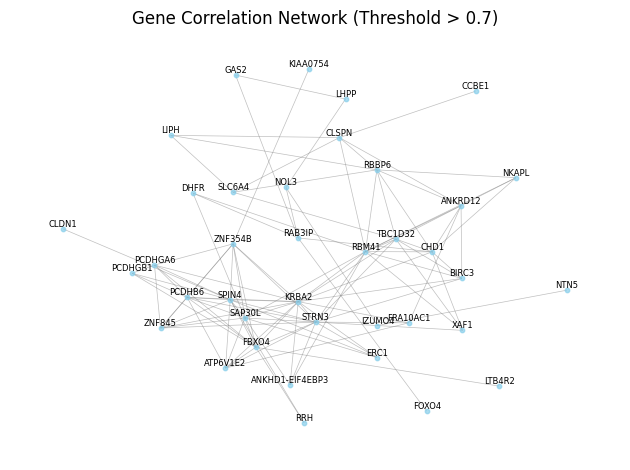

In [135]:
G= net.Graph()
X_filtered = filtered_df.drop(columns=['label'])
labels = filtered_df['label']
gene_correlation_matrix = X_filtered.corr()
threshold = 0.7

genes = X_filtered.columns
for gene in genes:
    G.add_node(gene, label='Gene')

for gene1 in genes:
    for gene2 in genes:
        if gene1 != gene2 and abs(gene_correlation_matrix[gene1][gene2]) > threshold:
            G.add_edge(gene1, gene2, weight=gene_correlation_matrix[gene1][gene2])

filtered_genes = [node for node in G.nodes if G.degree[node] > 0]

filtered_G = G.subgraph(filtered_genes)

pos = net.spring_layout(filtered_G, k=0.8)  

node_labels = {gene: gene for gene in filtered_genes}

net.draw_networkx_nodes(filtered_G, pos, node_size=10, node_color='skyblue', alpha=0.7)
net.draw_networkx_labels(filtered_G, pos, labels=node_labels, font_size=6, font_color='black', verticalalignment='bottom')

edges = filtered_G.edges()
net.draw_networkx_edges(filtered_G, pos, edgelist=edges, edge_color='gray', width=0.5, alpha=0.5)

plt.title('Gene Correlation Network (Threshold > 0.7)')
plt.axis('off')  
plt.tight_layout()
plt.show()

SHAPley explaianble AI

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import shap

In [111]:
unique, counts= np.unique(labels, return_counts=True)
dict(zip(unique,counts))

{'Control': 81, 'PD': 69}

In [112]:
X_train_shap, X_test_shap, y_train_shap, y_test_shap = train_test_split(X_filtered, labels, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_shap = scaler.fit_transform(X_train_shap)
X_test_shap = scaler.transform(X_test_shap)

In [113]:
label_encoder = LabelEncoder()
y_train_shap = label_encoder.fit_transform(y_train_shap)
y_test_shap = label_encoder.fit_transform(y_test_shap)

In [114]:
rf = RandomForestClassifier()
rf.fit(X_train_shap, y_train_shap)

RandomForestClassifier()

In [115]:
y_pred = rf.predict(X_test_shap)  
accuracy = accuracy_score(y_test_shap, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8333333333333334


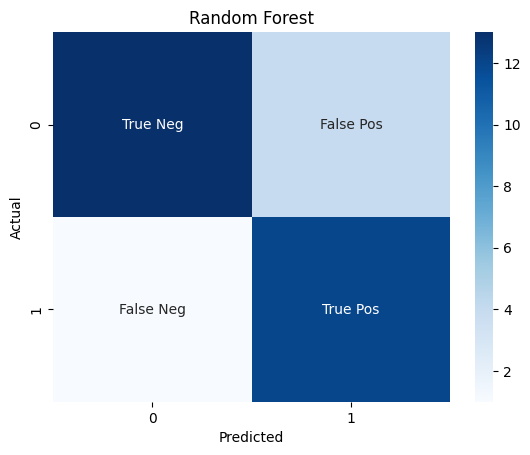

In [116]:
cm = confusion_matrix(y_test_shap, y_pred)
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')
plt.title("Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [117]:
report = classification_report(y_test_shap, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.76      0.84        17
           1       0.75      0.92      0.83        13

    accuracy                           0.83        30
   macro avg       0.84      0.84      0.83        30
weighted avg       0.85      0.83      0.83        30



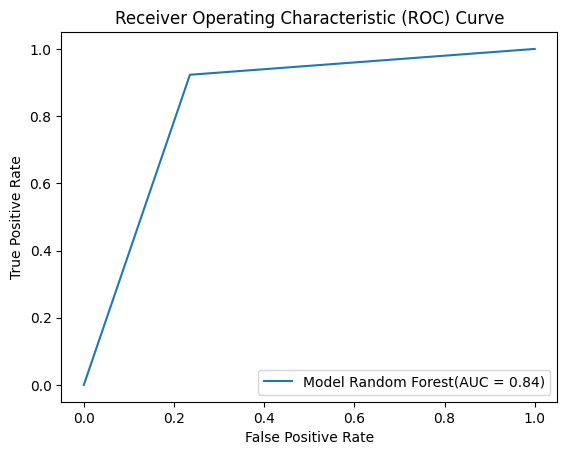

In [118]:
auc_model_rf = roc_auc_score(y_test_shap, y_pred)

false_positive_rate_rf, true_positive_rate_rf, _ = roc_curve(y_test_shap, y_pred)

plt.plot(false_positive_rate_rf, true_positive_rate_rf, label='Model Random Forest(AUC = {:.2f})'.format(auc_model_rf))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

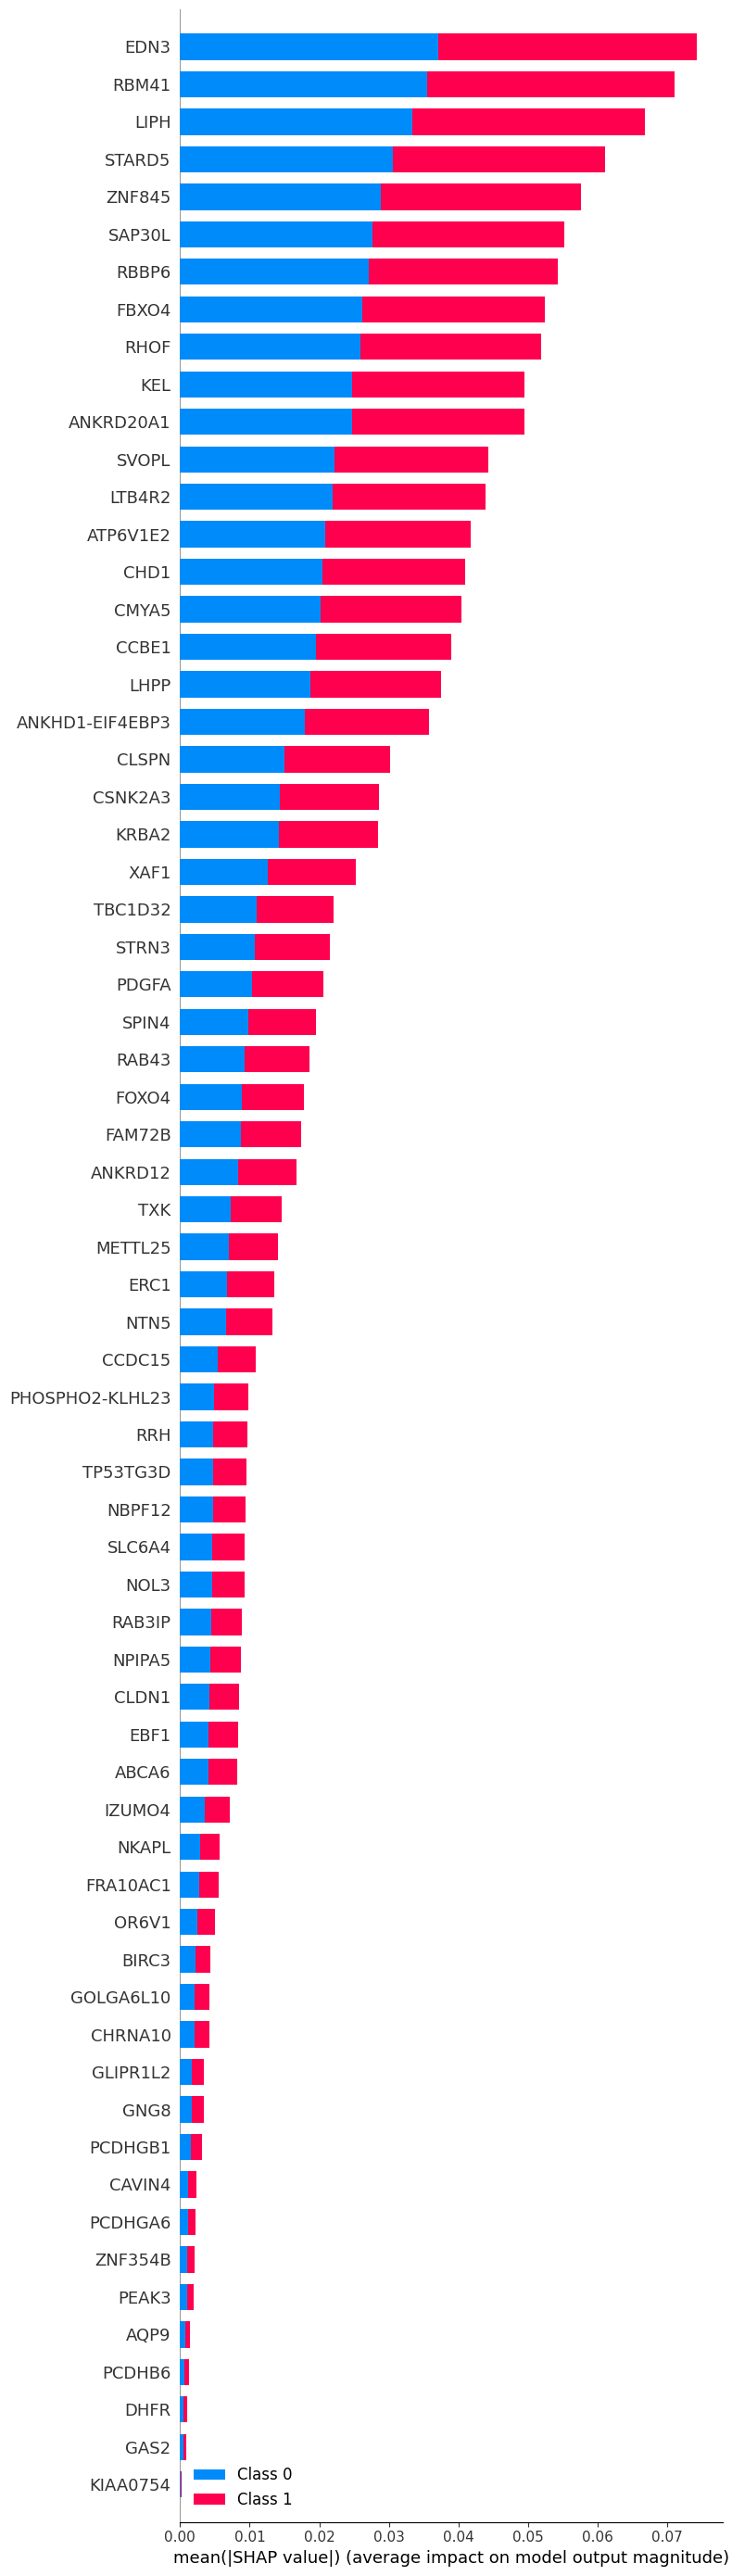

In [128]:
explainer = shap.Explainer(rf)
shap_values = explainer.shap_values(X_filtered)
shap.summary_plot(shap_values, X_filtered, max_display=100)

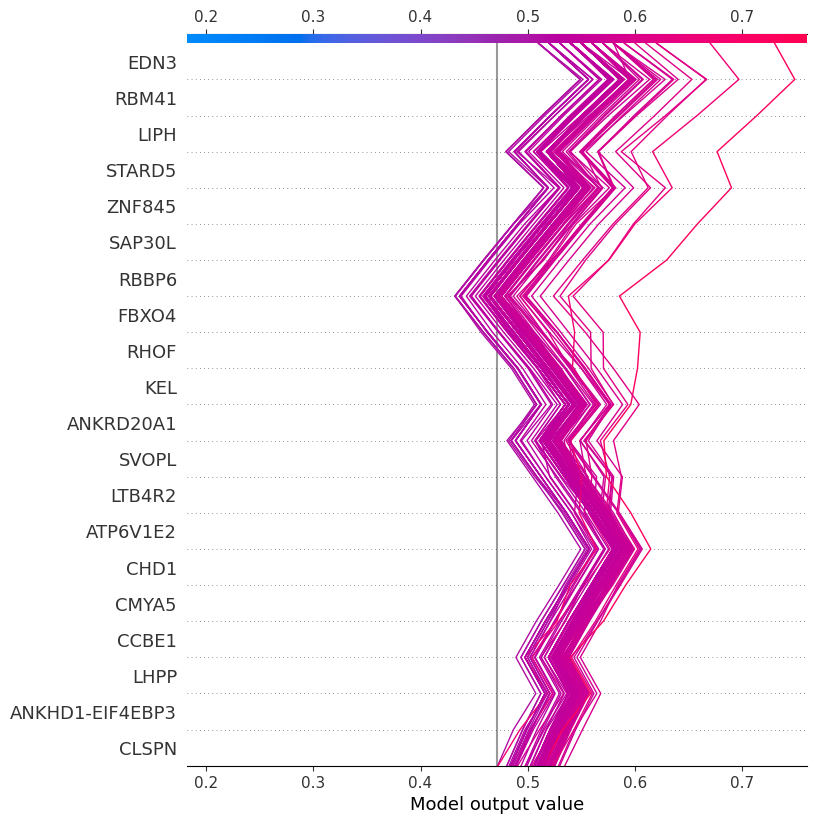

In [129]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_filtered, highlight=[X_filtered.columns.get_loc("CLSPN")])
plt.show()


In [126]:
choosen_instance = X_filtered.loc[[67]]
choosen_instance

,CLSPN,KIAA0754,FAM72B,NBPF12,ATP6V1E2,PHOSPHO2-KLHL23,RAB43,LIPH,CLDN1,TXK,...,CCBE1,IZUMO4,PEAK3,GNG8,NTN5,ZNF845,EDN3,SPIN4,FOXO4,RBM41
67,18,82,3,1322,59,2,13,32,0,19,...,156,33,34,4,10,20,3,4,1608,71


In [127]:
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)